#### Import tensorflow and load the MNIST dataset (provided by tf.keras.datasets)

In [12]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

print(f"training images shape: {x_train.shape}")
print(f"testing images shape: {x_test.shape}")

training images shape: (60000, 28, 28)
testing images shape: (10000, 28, 28)


In [14]:
# reshape to include greyscale dimension
# normalize pixel values by dividing by 255 (makes training faster since values are smaller)

x_train, x_test = x_train.reshape(60000, 28, 28, 1), x_test.reshape(10000, 28, 28, 1)
x_train, x_test = x_train/255., x_test/255.

#### Model Fitting

In [21]:
# define model, layer by layer
model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'), #relu is a very common activation
            tf.keras.layers.Dense(10, activation='softmax') # 10 classes, softmax basically gives prob's of digit being each class
        ])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', #for explanation of sparse vs regular categorical cross entry see below
                metrics=['acc'])
    
# model fitting
history = model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1239 - acc: 0.7358
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4621 - acc: 0.8798
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3702 - acc: 0.8989
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3333 - acc: 0.9056
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3121 - acc: 0.9114
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2970 - acc: 0.9145
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2847 - acc: 0.9182
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2745 - acc: 0.9212
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2646 - acc: 0.9237
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2551 - acc: 0.9255
Epoch 11/20
1875/1875 [======

From [stack overflow](https://stackoverflow.com/questions/58565394/what-is-the-difference-between-sparse-categorical-crossentropy-and-categorical-c):

"For sparse_categorical_crossentropy, For class 1 and class 2 targets, in a 5-class classification problem, the list should be [1,2]. Basically, the targets should be in integer form in order to call sparse_categorical_crossentropy. This is called sparse since the target representation requires much less space than one-hot encoding. For example, a batch with b targets and k classes needs b * k space to be represented in one-hot, whereas a batch with b targets and k classes needs b space to be represented in integer form.

"For categorical_crossentropy, for class 1 and class 2 targets, in a 5-class classification problem, the list should be [[0,1,0,0,0], [0,0,1,0,0]]. Basically, the targets should be in one-hot form in order to call categorical_crossentropy."

#### Looks good right? Let's see how the model does on the test images that it hasn't seen before

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1770 - acc: 0.9497


[0.17698977887630463, 0.9496999979019165]

#### Solid!

#### However, a common conern in deep learning is "overfitting" a model to training data, which means the model is basically just memorizing the right answers for the data it has seen and not really learning, in the sense that it can't generalize as well to data it hasn't seen before

#### To combat this we can start by holding out a set of the training data as "validation" data.

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1683 - acc: 0.9527 - val_loss: 0.1635 - val_acc: 0.9520
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1629 - acc: 0.9541 - val_loss: 0.1605 - val_acc: 0.9536
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1578 - acc: 0.9552 - val_loss: 0.1606 - val_acc: 0.9539
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1533 - acc: 0.9563 - val_loss: 0.1566 - val_acc: 0.9538
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1487 - acc: 0.9575 - val_loss: 0.1538 - val_acc: 0.9547
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1444 - acc: 0.9587 - val_loss: 0.1519 - val_acc: 0.9552
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1404 - acc: 0.9598 - val_loss: 0.1508 - val_acc: 0.9550
Epoch 8/30
1500/1500 [==============================] - 3s 2ms

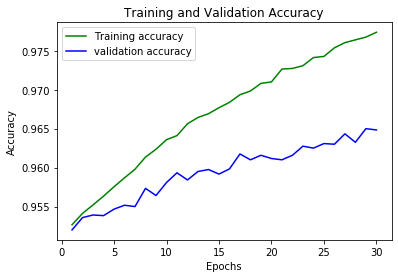

In [29]:
import matplotlib.pyplot as plt

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Seems like both accuracies are still climbing, so let's up the epochs (note: this may take a bit)

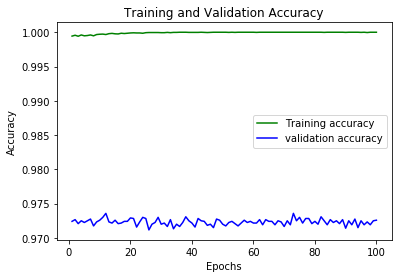

In [31]:
history = model.fit(
    x_train, y_train,
    epochs=100,
    validation_data=(x_val, y_val),
    verbose=0) #verbose can be used to show less trianing info

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()